In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
smoking=pd.get_dummies(dataset['smoker'],drop_first=True,dtype=float)

In [5]:
dataset.drop('smoker',axis=1,inplace=True)

In [6]:
dataset.head()

,age,sex,bmi,children,region,charges
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520


In [7]:
dataset = pd.concat([dataset,smoking],axis=1)
dataset.head()

,age,sex,bmi,children,region,charges,yes
0,19,female,27.900,0,southwest,16884.92400,1.0
1,18,male,33.770,1,southeast,1725.55230,0.0
2,28,male,33.000,3,southeast,4449.46200,0.0
3,33,male,22.705,0,northwest,21984.47061,0.0
4,32,male,28.880,0,northwest,3866.85520,0.0


In [8]:
dataset.rename(columns={'yes':'smoker'},inplace=True)

In [9]:
dataset.head()

,age,sex,bmi,children,region,charges,smoker
0,19,female,27.900,0,southwest,16884.92400,1.0
1,18,male,33.770,1,southeast,1725.55230,0.0
2,28,male,33.000,3,southeast,4449.46200,0.0
3,33,male,22.705,0,northwest,21984.47061,0.0
4,32,male,28.880,0,northwest,3866.85520,0.0


In [10]:
sex=pd.get_dummies(dataset['sex'],drop_first=True,dtype=float)
sex.rename(columns={'male':'sex'},inplace=True)

In [11]:
dataset.drop('sex',inplace=True,axis=1)

In [12]:
dataset=pd.concat([sex,dataset],axis=1)

In [13]:
dataset.head()

,sex,age,bmi,children,region,charges,smoker
0,0.0,19,27.900,0,southwest,16884.92400,1.0
1,1.0,18,33.770,1,southeast,1725.55230,0.0
2,1.0,28,33.000,3,southeast,4449.46200,0.0
3,1.0,33,22.705,0,northwest,21984.47061,0.0
4,1.0,32,28.880,0,northwest,3866.85520,0.0


In [15]:
region=pd.get_dummies(dataset['region'],dtype=float)

In [16]:
dataset.drop('region',inplace=True,axis=1)

In [17]:
dataset=pd.concat([dataset,region],axis=1)

In [18]:
dataset.head()

,sex,age,bmi,children,charges,smoker,northeast,northwest,southeast,southwest
0,0.0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,1.0
1,1.0,18,33.770,1,1725.55230,0.0,0.0,0.0,1.0,0.0
2,1.0,28,33.000,3,4449.46200,0.0,0.0,0.0,1.0,0.0
3,1.0,33,22.705,0,21984.47061,0.0,0.0,1.0,0.0,0.0
4,1.0,32,28.880,0,3866.85520,0.0,0.0,1.0,0.0,0.0


C:\Users\91949\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


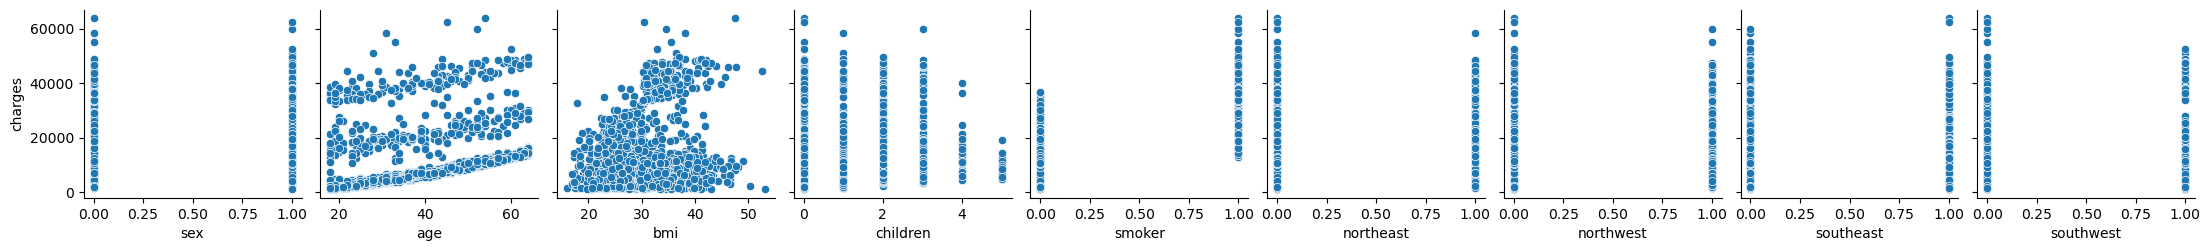

In [156]:
sns.pairplot(dataset, x_vars=['sex','age','bmi','children','smoker','northeast','northwest','southeast','southwest'], y_vars=['charges'], kind='scatter')

In [19]:
dataset.corr()

,sex,age,bmi,children,charges,smoker,northeast,northwest,southeast,southwest
sex,1.000000,-0.020856,0.046371,0.017163,0.057292,0.076185,-0.002425,-0.011156,0.017117,-0.004184
age,-0.020856,1.000000,0.109272,0.042469,0.299008,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.046371,0.109272,1.000000,0.012759,0.198341,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.017163,0.042469,0.012759,1.000000,0.067998,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.057292,0.299008,0.198341,0.067998,1.000000,0.787251,0.006349,-0.039905,0.073982,-0.043210
smoker,0.076185,-0.025019,0.003750,0.007673,0.787251,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,-0.002425,0.002475,-0.138156,-0.022808,0.006349,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.011156,-0.000407,-0.135996,0.024806,-0.039905,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,0.017117,-0.011642,0.270025,-0.023066,0.073982,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,-0.004184,0.010016,-0.006205,0.021914,-0.043210,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


Text(0.5, 1.0, 'correlation matrix')

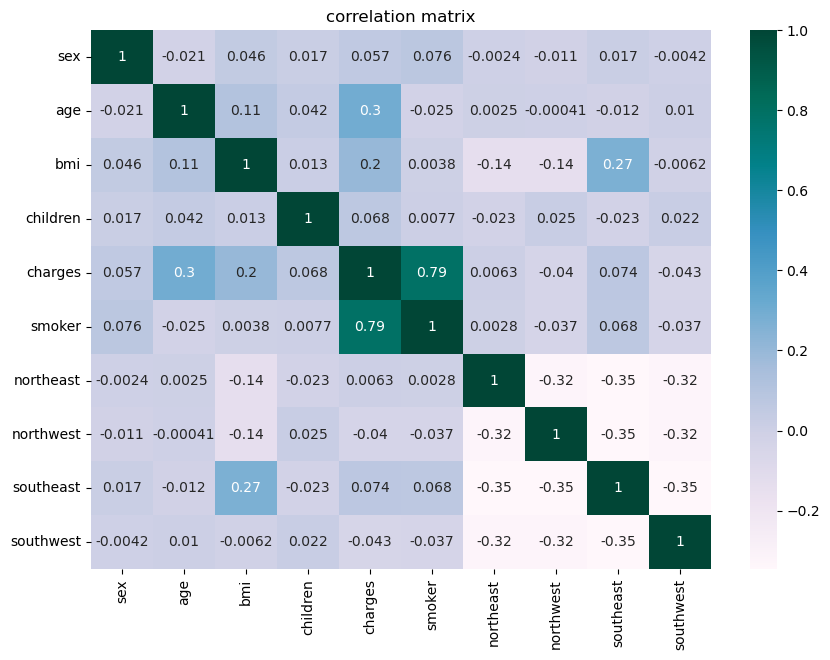

In [154]:
correlation = dataset.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='PuBuGn')
plt.title('correlation matrix')

# Linear Regression

In [20]:
X=dataset[['sex','age','bmi','children','smoker','northeast','northwest','southeast','southwest']]
Y=dataset['charges']

In [21]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(dataset.drop(['charges'],axis=1),dataset['charges'],test_size=0.2)

In [141]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [129]:
linmodel=LinearRegression()
linmodel.fit(X_train,Y_train)

LinearRegression()

In [130]:
y_predict = linmodel.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error

In [132]:
# conf_matrix = confusion_matrix(Y_test,y_predict)
mse = mean_absolute_error(Y_test,y_predict)
mse

4367.84668158053

In [133]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_predict)
score

0.7094756224608649

# Random forest regression

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
random_forest= RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [144]:
predictions = random_forest.predict(X_test)

In [145]:
single_prediction= random_forest.predict([[1,42,24,1,1,1,0,0,0]])
single_prediction

C:\Users\91949\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21377.9567221])

In [ ]:
from sklearn.metrics import r2_score
mae =mean_absolute_error(Y_test,predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)
score=r2_score(Y_test,predictions)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 score:",score)

: 

In [167]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,predictions)
print("r2 score:",score)

Accuracy: 0.8727937657140327


In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, predictions)

rmse = mean_squared_error(Y_test, predictions, squared=False)

score = r2_score(Y_test, predictions)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Error:", score)

SyntaxError: invalid non-printable character U+00A0 (1892686802.py, line 11)

# Gradient boosting regression

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gb_regressor = GradientBoostingRegressor(n_estimators=100,learning_rate=0.2,random_state=42)
gb_regressor.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.2, random_state=42)

In [37]:
predictions = gb_regressor.predict(X_test)

In [38]:
mse = mean_absolute_error(Y_test,predictions)
mse

2720.122219917531

In [39]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,predictions)
score

0.7987140108536481

# support vector regressor

In [40]:
from sklearn.svm import SVR

In [41]:
regressor = SVR(kernel='rbf', C=1.0, epsilon=0.9)
regressor.fit(X_train,Y_train)

SVR(epsilon=0.9)

In [42]:
predictions = regressor.predict(X_test)

In [43]:
mse = mean_absolute_error(Y_test,predictions)
mse

7549.378717862402

In [44]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,predictions)
score

-0.09266219917635077